In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
general_stats = pd.read_csv('../reports/1-general_stats_table.tsv', sep='\t', index_col=0)
general_stats = pd.read_csv('../reports/2-general_stats_table_fastpR.tsv', sep='\t', index_col=0)
general_stats

,Dups,GC,Median len,Seqs
Sample,,,,
CV_GBM_C009_trim_R1,98.010732,59,37,31.531637
CV_GBM_C009_trim_R2,97.716618,58,37,31.531637
CV_GBM_C010_trim_R1,97.279426,58,32,21.051643
CV_GBM_C010_trim_R2,96.970506,58,32,21.051643
CV_GBM_C011_trim_R1,97.961024,59,37,28.495426
...,...,...,...,...
GB24_33_trim_R2,96.635642,57,47,13.293164
GB24_37_trim_R1,98.075444,59,47,28.719697
GB24_37_trim_R2,97.771379,58,47,28.719697


In [5]:
general_stats_GB = general_stats[general_stats.index.str.startswith("GB")]
general_stats_control = general_stats[~general_stats.index.str.startswith("GB")]

In [6]:
def describe_stats(df):
	mean_std = df.agg(['mean', 'std']).round(2)
	median_iqr = df.agg([
		'median',
		lambda x: x.quantile(0.25),
		lambda x: x.quantile(0.75),
		lambda x: x.quantile(0.75) - x.quantile(0.25)
	]).round(2)
	median_iqr.index = ['median', 'Q1', 'Q3', 'IQR']
	print("Media y desviación típica:")
	print(mean_std)
	print("\nMediana y rango intercuartílico (IQR):")
	print(median_iqr)


In [7]:
describe_stats(general_stats_GB)

Media y desviación típica:
       Dups     GC  Median len   Seqs
mean  98.26  58.00       50.37  23.79
std    0.38   0.55        5.81   6.58

Mediana y rango intercuartílico (IQR):
         Dups    GC  Median len   Seqs
median  98.32  58.0        47.0  23.94
Q1      98.08  58.0        47.0  18.93
Q3      98.50  58.0        57.0  28.77
IQR      0.42   0.0        10.0   9.84


In [8]:
describe_stats(general_stats_control)

Media y desviación típica:
       Dups     GC  Median len   Seqs
mean  98.01  58.03       41.36  22.95
std    0.67   0.58        7.81   7.10

Mediana y rango intercuartílico (IQR):
         Dups    GC  Median len   Seqs
median  98.12  58.0        42.0  25.13
Q1      97.86  58.0        37.0  20.43
Q3      98.40  58.0        47.0  27.84
IQR      0.54   0.0        10.0   7.41


In [43]:
describe_stats(general_stats)

Media y desviación típica:
       Dups     GC    Seq
mean  97.71  66.31  36.71
std    0.53   3.85   6.42

Mediana y rango intercuartílico (IQR):
         Dups    GC    Seq
median  97.72  66.0  36.49
Q1      97.34  63.0  33.49
Q3      98.03  69.0  40.09
IQR      0.69   6.0   6.60


In [10]:
fastqc_length = pd.read_csv('../reports/fastqc_length_distribution.txt', sep='\t', index_col=0)
fastqc_length

,15,20,25,30,35,40,45,50,55,60,...,110,115,120,125,130,135,140,145,150,TOTAL
Sample,,,,,,,,,,,,,,,,,,,,,
CV_GBM_C009_trim_R1,2803283,3967721,4115217,4157156,2496224,2366856,3010790,1482412,1358040,1946219,...,189542,219778,79005,44886,47457,48209,35923,49258,442201,"40,85294224"
CV_GBM_C009_trim_R2,2779041,3764620,4033629,4295613,2495535,2361418,3006884,1479776,1357550,1947702,...,191354,219355,79616,44902,47115,48701,36146,50028,447835,"41,25826071"
CV_GBM_C010_trim_R1,2488609,3157984,2635603,2697734,1639324,1672026,1915723,857933,853419,939161,...,93179,112288,37381,28549,33069,42004,27047,28594,275010,"38,47808981"
CV_GBM_C010_trim_R2,2465089,3050181,2581259,2754193,1639342,1671311,1912932,856536,853236,939988,...,94362,111808,37579,28412,32966,42492,27136,29291,278880,"38,90395087"
CV_GBM_C011_trim_R1,2336501,3762869,3623044,3815865,2311719,2244685,2836635,1280092,1196890,1754231,...,168971,202362,56583,34639,36467,34394,28402,44179,308565,"40,38656801"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GB24_33_trim_R2,1340131,1079119,1071779,1088897,549579,1153855,728966,617451,948444,1799345,...,164468,304413,93035,41500,96268,60600,47979,54989,645707,"52,76633238"
GB24_37_trim_R1,1524666,1938873,2401998,2910055,1578300,2751616,3066167,1861991,2220870,3137175,...,293581,775697,187289,77366,123853,98201,56542,77587,507162,"49,92383294"
GB24_37_trim_R2,1513074,1571296,2364754,3233754,1577651,2747932,3062816,1854830,2220297,3142706,...,294722,776054,187870,77709,123562,99623,55365,77673,511633,"50,26438319"


In [32]:
length_stats_GB = fastqc_length[fastqc_length.index.str.startswith("GB")]
length_stats_control = fastqc_length[~fastqc_length.index.str.startswith("GB")]
length_stats_DC = fastqc_length.loc[fastqc_length.index.str.startswith("DC")]
length_stats_CV = fastqc_length.loc[fastqc_length.index.str.startswith("CV")]

In [59]:
gb_medians = length_stats_GB['TOTAL'].str.replace(',', '.').astype(float)
cv_medians = length_stats_CV['TOTAL'].str.replace(',', '.').astype(float)
dc_medians = length_stats_DC['TOTAL'].str.replace(',', '.').astype(float)


In [69]:
from scipy.stats import mannwhitneyu

In [ ]:
df = pd.DataFrame({
    'valor': pd.concat([gb_medians, cv_medians, dc_medians], ignore_index=True),
    'grupo': ['GB'] * len(gb_medians) + ['CV'] * len(cv_medians) + ['DC'] * len(dc_medians)
})

/var/folders/97/svfzpdps453btxpmb702yxpw0000gn/T/ipykernel_98595/2545984396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='grupo', y='valor', inner=None, cut=0, linewidth=0,
/var/folders/97/svfzpdps453btxpmb702yxpw0000gn/T/ipykernel_98595/2545984396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='grupo', y='valor', width=0.15, palette=colores, order=orden,


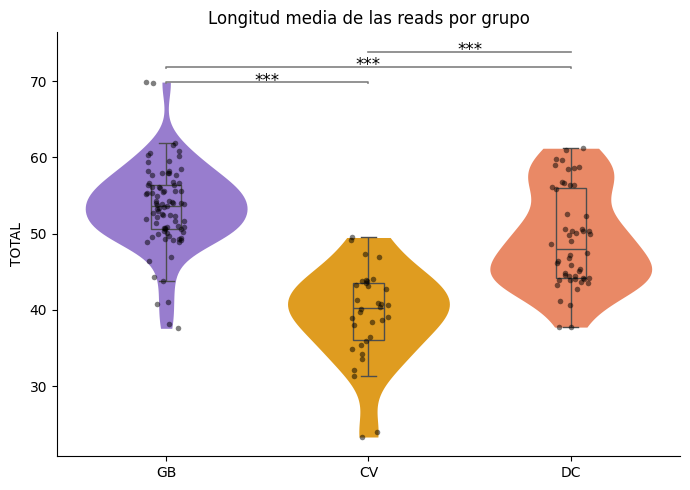

In [87]:
# Crear gráfico base
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x='grupo', y='valor', inner=None, cut=0, linewidth=0,
               palette=colores, order=orden)

sns.boxplot(data=df, x='grupo', y='valor', width=0.15, palette=colores, order=orden,
            boxprops={'zorder': 2}, showcaps=True, showfliers=False, whiskerprops={'linewidth': 1})

sns.stripplot(data=df, x='grupo', y='valor', size=4, color='k', alpha=0.5, order=orden)

# === Estadística ===
comparaciones = [('GB', 'CV'), ('GB', 'DC'), ('CV', 'DC')]
posiciones_y = [df['valor'].max() + i*2 for i in range(len(comparaciones))]

for (grupo1, grupo2), y in zip(comparaciones, posiciones_y):
    datos1 = df[df['grupo'] == grupo1]['valor']
    datos2 = df[df['grupo'] == grupo2]['valor']
    stat, p = mannwhitneyu(datos1, datos2, alternative='two-sided')
    
    # Significancia como texto
    if p < 0.001:
        signif = '***'
    elif p < 0.01:
        signif = '**'
    elif p < 0.05:
        signif = '*'
    else:
        signif = 'ns'
    
    # Coordenadas
    x1 = orden.index(grupo1)
    x2 = orden.index(grupo2)
    
    # Dibujar línea de comparación
    plt.plot([x1, x1, x2, x2], [y-0.1, y, y, y-0.1], lw=1.2, color='grey')
    plt.text((x1 + x2) / 2, y - 1, signif, ha='center', va='bottom', fontsize=12)

# Personalización
sns.despine()
plt.xlabel('')
plt.ylabel('TOTAL')
plt.title('Longitud media de las reads por grupo')
plt.tight_layout()
plt.show()

In [71]:
stat, p_value = mannwhitneyu(gb_medians.values, dc_medians.values, alternative='two-sided')
print(f"Mann-Whitney U test statistic: {stat:.2f}, p-value: {p_value:.10f}")

Mann-Whitney U test statistic: 3087.00, p-value: 0.0001863338


In [72]:
stat, p_value = mannwhitneyu(gb_medians.values, cv_medians.values, alternative='two-sided')
print(f"Mann-Whitney U test statistic: {stat:.2f}, p-value: {p_value:.10f}")

Mann-Whitney U test statistic: 2822.00, p-value: 0.0000000000


In [73]:
stat, p_value = mannwhitneyu(dc_medians.values, cv_medians.values, alternative='two-sided')
print(f"Mann-Whitney U test statistic: {stat:.2f}, p-value: {p_value:.10f}")

Mann-Whitney U test statistic: 1575.00, p-value: 0.0000000011
